# Comparing Random Forest with Artificial Neural Network in prediction of parental status in 50+ adults 

## Imports and setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import seaborn as sns
import pyreadstat # to read spss files
import sys
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import Recall

In [2]:
path_6 = 'C:/Users/Lenovo/Documents/Školka/PhD/SHARE/SHARE wave 6/'
sns.set(style='darkgrid', context='notebook')

In [3]:
# setup for seeing all rows and columns

# pd.set_option('display.max_columns', None)
# pd.set_option('max_rows', None)
# np.set_printoptions(threshold=sys.maxsize)

## Import of data, data exploration and data cleaning

This section is rather tedius,as it contains not only the importing and merging of three different modules, but also cleaning of the data. One note worth mentioning is that data from SHARE is in .sav files, which are files for SPSS program. To obtain both meta data and data for the analysis, the library pyreadstat was used. More information about the library can be found [here](https://github.com/Roche/pyreadstat/blob/master/README.md).


### Social networks module

In [4]:
ntw, meta_n = pyreadstat.read_sav(path_6+'sharew6_rel6-0-0_gv_networks.sav')
print(ntw.shape)
ntw.head()

(68231, 216)


,mergeid,hhid6,mergeidp6,coupleid6,country,language,panel_status,panel_change_size,panel_lost,panel_new,...,hh_gave_care_sn_5,hh_gave_care_sn_6,hh_gave_care_sn_7,hh_receive_care_sn_1,hh_receive_care_sn_2,hh_receive_care_sn_3,hh_receive_care_sn_4,hh_receive_care_sn_5,hh_receive_care_sn_6,hh_receive_care_sn_7
0,AT-000674-01,AT-000674-A,,,11.0,11.0,3.0,1.0,0.0,1.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
1,AT-001215-01,AT-001215-A,,,11.0,11.0,3.0,-1.0,1.0,0.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
2,AT-001492-01,AT-001492-A,AT-001492-02,AT-001492-01-02,11.0,11.0,3.0,-1.0,2.0,1.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
3,AT-001492-02,AT-001492-A,AT-001492-01,AT-001492-01-02,11.0,11.0,3.0,2.0,0.0,2.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
4,AT-001881-01,AT-001881-A,,,11.0,11.0,3.0,0.0,1.0,1.0,...,-9.0,-9.0,-9.0,0.0,0.0,0.0,-9.0,-9.0,-9.0,-9.0


#### Meta data exploration

In [5]:
print(meta_n.number_rows)
print(meta_n.number_columns)
print(meta_n.file_label)
print(meta_n.file_encoding)

68231
216
None
UTF-8


In [6]:
print(meta_n.column_labels[:10])

['Person identifier (fix across modules and waves)', 'Household identifier (wave 6)', 'Partner identifier (wave 6)', 'Couple identifier (wave 6)', 'Country identifier', 'Language of questionnaire', 'In which waves was SN done?', 'W6 SN size - w4 SN size (if both done)', 'Number of lost wave 4 SN members', 'Number of new wave 6 SN members']


In [7]:
# meta_n.variable_to_label

In [8]:
# meta_n.column_names_to_labels

In [9]:
# print(meta_n.column_names)

#### Dropping redundant variables

In [10]:
drop_nw = ['hhid6', 'mergeidp6', 'coupleid6', 'language', 'panel_status', 'fin_gave', 'snfin_gave', 'fin_received', 
           'snfin_received', 'gift_received', 
           'sngift_received', 'gift_gave', 'sngift_gave', 'w6_sn_mentioned_before_1', 'w6_sn_mentioned_before_2', 
           'w6_sn_mentioned_before_3', 'w6_sn_mentioned_before_4', 'w6_sn_mentioned_before_5', 'w6_sn_mentioned_before_6',
           'w6_sn_mentioned_before_7', 'w6_sn_w4_position_1', 'w6_sn_w4_position_2', 'w6_sn_w4_position_3', 
           'w6_sn_w4_position_4', 'w6_sn_w4_position_5', 'w6_sn_w4_position_6', 'w6_sn_w4_position_7', 
           'w4_sn_mentioned_again_1', 'w4_sn_mentioned_again_2', 'w4_sn_mentioned_again_3', 'w4_sn_mentioned_again_4',
           'w4_sn_mentioned_again_5', 'w4_sn_mentioned_again_6', 'w4_sn_mentioned_again_7', 'sn_person_1', 'sn_person_2', 
           'sn_person_3', 'sn_person_4', 'sn_person_5', 'sn_person_6', 'sn_person_7', 'occ_1', 'occ_2', 'occ_3', 'occ_4', 
           'occ_5', 'occ_6', 'occ_7', 'occ_det_1', 'occ_det_2', 'occ_det_3', 'occ_det_4', 'occ_det_5', 'occ_det_6', 
           'occ_det_7', 'partner_1', 'partner_2', 'partner_3', 'partner_4', 'partner_5', 'partner_6', 'partner_7', 
           'partner_det_1', 'partner_det_2', 'partner_det_3', 'partner_det_4', 'partner_det_5', 'partner_det_6', 
           'partner_det_7', 'fin_gave_sn_1', 'fin_gave_sn_2', 'fin_gave_sn_3', 'fin_gave_sn_4', 'fin_gave_sn_5', 
           'fin_gave_sn_6', 'fin_gave_sn_7', 'fin_received_sn_1', 'fin_received_sn_2', 'fin_received_sn_3', 
           'fin_received_sn_4', 'fin_received_sn_5', 'fin_received_sn_6', 'fin_received_sn_7', 'gift_received_sn_1',
           'gift_received_sn_2', 'gift_received_sn_3', 'gift_received_sn_4', 'gift_received_sn_5', 'gift_received_sn_6', 
           'gift_received_sn_7', 'gift_gave_sn_1', 'gift_gave_sn_2', 'gift_gave_sn_3', 'gift_gave_sn_4', 'gift_gave_sn_5',
           'gift_gave_sn_6', 'gift_gave_sn_7', 'outhh_gave_care_sn_1', 'outhh_gave_care_sn_2', 'outhh_gave_care_sn_3', 
           'outhh_gave_care_sn_4', 'outhh_gave_care_sn_5', 'outhh_gave_care_sn_6', 'outhh_gave_care_sn_7', 
           'hh_gave_care_sn_1', 'hh_gave_care_sn_2', 'hh_gave_care_sn_3', 'hh_gave_care_sn_4', 'hh_gave_care_sn_5', 
           'hh_gave_care_sn_6', 'hh_gave_care_sn_7'    
]

In [11]:
ntw = ntw.drop(drop_nw, axis=1)
ntw.shape

(68231, 105)

#### Selecting only Czechia

as the main analysis focuses on differences within Czech respondents.

In [12]:
ntw_cz = ntw[ntw['country'] == 28]
ntw_cz.shape

(4858, 105)

In [13]:
# checking the missing data
ntw_cz.isnull().sum()

mergeid                    0
country                    0
panel_change_size       1338
panel_lost                 0
panel_new                  0
                        ... 
hh_receive_care_sn_3       0
hh_receive_care_sn_4       0
hh_receive_care_sn_5       0
hh_receive_care_sn_6       0
hh_receive_care_sn_7       0
Length: 105, dtype: int64

In [14]:
ntw_cz.isnull().sum().sum()

2138

### Social support module

In [15]:
sp, meta_sp = pyreadstat.read_sav(path_6+'sharew6_rel6-0-0_sp.sav')
print(sp.shape)
sp.head()

(68231, 169)


,mergeid,hhid6,mergeidp6,coupleid6,country,language,sp002_,sp003_1,sp003_2,sp003_3,...,sp031_3,sp031_4,sp032_1,sp032_2,sp033_1,sp033_2,sp033_3,sp033_4,sp034_1,sp034_2
0,AT-000674-01,AT-000674-A,,,11.0,11.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AT-001215-01,AT-001215-A,,,11.0,11.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AT-001492-01,AT-001492-A,AT-001492-02,AT-001492-01-02,11.0,11.0,1.0,1.0,29.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AT-001492-02,AT-001492-A,AT-001492-01,AT-001492-01-02,11.0,11.0,5.0,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AT-001881-01,AT-001881-A,,,11.0,11.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# meta_sp.column_names_to_labels

In [17]:
print(meta_sp.column_names)

['mergeid', 'hhid6', 'mergeidp6', 'coupleid6', 'country', 'language', 'sp002_', 'sp003_1', 'sp003_2', 'sp003_3', 'sp004d1_1', 'sp004d1_2', 'sp004d1_3', 'sp004d2_1', 'sp004d2_2', 'sp004d2_3', 'sp004d3_1', 'sp004d3_2', 'sp004d3_3', 'sp005_1', 'sp005_2', 'sp005_3', 'sp007_1', 'sp007_2', 'sp007_3', 'sp008_', 'sp009_1', 'sp009_2', 'sp009_3', 'sp010d1_1', 'sp010d1_2', 'sp010d1_3', 'sp010d2_1', 'sp010d2_2', 'sp010d2_3', 'sp010d3_1', 'sp010d3_2', 'sp010d3_3', 'sp011_1', 'sp011_2', 'sp011_3', 'sp013_1', 'sp013_2', 'sp013_3', 'sp014_', 'sp015d1', 'sp015d2', 'sp015d3', 'sp015d4', 'sp015d5', 'sp015d6', 'sp015d7', 'sp015d8', 'sp015d9', 'sp015d10', 'sp015d11', 'sp015d12', 'sp015d13', 'sp015d14', 'sp015d15', 'sp015d16', 'sp015d17', 'sp015d18', 'sp015d19', 'sp015d20', 'sp015d21', 'sp016_1', 'sp016_2', 'sp016_3', 'sp016_4', 'sp016_5', 'sp016_6', 'sp016_7', 'sp016_8', 'sp016_9', 'sp016_10', 'sp016_11', 'sp016_12', 'sp016_13', 'sp016_14', 'sp016_15', 'sp016_16', 'sp016_17', 'sp016_18', 'sp016_19', 'sp016

#### Dropping redundant variables

In [18]:
drop_sp = ['hhid6', 'mergeidp6', 'coupleid6', 'language', 'sp008_', 'sp009_1', 'sp009_2', 'sp009_3', 'sp010d1_1', 
           'sp010d1_2', 'sp010d1_3', 'sp010d2_1',
           'sp010d2_2', 'sp010d2_3', 'sp010d3_1', 'sp010d3_2', 'sp010d3_3', 'sp011_1', 'sp011_2', 'sp011_3', 'sp013_1', 
           'sp013_2', 'sp013_3', 'sp014_', 'sp015d1', 'sp015d2', 'sp015d3', 'sp015d4', 'sp015d5', 'sp015d6', 'sp015d7', 
           'sp015d8', 'sp015d9', 'sp015d10', 'sp015d11', 'sp015d12', 'sp015d13', 'sp015d14', 'sp015d15', 'sp015d16', 
           'sp015d17', 'sp015d18', 'sp015d19', 'sp015d20', 'sp015d21', 'sp016_1', 'sp016_2', 'sp016_3', 'sp016_4', 
           'sp016_5', 'sp016_6', 'sp016_7', 'sp016_8', 'sp016_9', 'sp016_10', 'sp016_11', 'sp016_12', 'sp016_13', 
           'sp016_14', 'sp016_15', 'sp016_16', 'sp016_17', 'sp016_18', 'sp016_19', 'sp016_20', 'sp018_', 'sp019d1', 
           'sp019d2', 'sp019d3', 'sp019d4', 'sp019d5', 'sp019d6', 'sp019d7', 'sp019d8', 'sp019d9', 'sp019d10', 'sp019d11',
           'sp019d20', 'sp019d21', 'sp019d22', 'sp019d23', 'sp019d24', 'sp019d25', 'sp019d26', 'sp019d27', 'sp019d28', 
           'sp019d29', 'sp019d30', 'sp019d31', 'sp019d32', 'sp019d35', 'sp019d36', 'sp019d37', 'sp019dno', 'sp022_',
           'sp029_1', 'sp029_2', 'sp029_3', 'sp031_1', 'sp031_2', 'sp031_3'
          ]

In [19]:
sp = sp.drop(drop_sp, axis=1)
sp.shape

(68231, 68)

#### Selecting only Czechia

In [20]:
sp_cz = sp[sp['country'] == 28]
sp_cz.shape

(4858, 68)

### Imputations module

In [21]:
imp, meta_imp = pyreadstat.read_sav(path_6+'sharew6_rel6-0-0_gv_imputations.sav')
print(imp.shape)
imp.head()

(68231, 257)


,mergeid,hhid6,mergeidp6,coupleid6,country,language,implicat,htype,fam_resp,fin_resp,...,clarif_f,undersq_f,hnrsc_f,currency,nomx2014,nomx2015,pppx2014,pppx2015,filter_$,PrimaryLast
0,AT-000674-01,AT-000674-A,,,11.0,11.0,5.0,1.0,1.0,1.0,...,3.0,3.0,3.0,euro,1.0,1.0,1.178,1.189,0.0,1.0
1,AT-001215-01,AT-001215-A,,,11.0,11.0,5.0,1.0,1.0,1.0,...,3.0,3.0,3.0,euro,1.0,1.0,1.178,1.189,0.0,1.0
2,AT-001492-01,AT-001492-A,AT-001492-02,AT-001492-01-02,11.0,11.0,5.0,3.0,1.0,1.0,...,3.0,3.0,3.0,euro,1.0,1.0,1.178,1.189,0.0,1.0
3,AT-001492-02,AT-001492-A,AT-001492-01,AT-001492-01-02,11.0,11.0,5.0,3.0,0.0,0.0,...,3.0,3.0,3.0,euro,1.0,1.0,1.178,1.189,0.0,1.0
4,AT-001881-01,AT-001881-A,,,11.0,11.0,5.0,1.0,1.0,1.0,...,3.0,3.0,3.0,euro,1.0,1.0,1.178,1.189,0.0,1.0


In [22]:
# meta_imp.column_names_to_labels

In [23]:
print(meta_imp.column_names)

['mergeid', 'hhid6', 'mergeidp6', 'coupleid6', 'country', 'language', 'implicat', 'htype', 'fam_resp', 'fin_resp', 'hou_resp', 'exrate', 'nursinghome', 'perho', 'otrf', 'single', 'couple', 'partner', 'p_nrp', 'sample1', 'sample2', 'sample3', 'inpat6', 'outpa6', 'drugs6', 'nurs6', 'ydip', 'yind', 'ypen1', 'ypen2', 'ypen3', 'ypen4', 'ypen5', 'ypen6', 'ylsp1', 'ylsp2', 'ylsp3', 'ylsp4', 'ylsp5', 'ylsp6', 'yreg1', 'yreg2', 'ylsr1', 'ylsr2', 'home', 'mort', 'rhre', 'ores', 'ysrent', 'yaohm', 'fahc', 'fohc', 'hprf', 'hmem', 'bacc', 'bsmf', 'ybabsmf', 'slti', 'vbus', 'sbus', 'car', 'liab', 'thinc2', 'thinc', 'thexp', 'hnetw', 'yincnrp', 'hrass', 'hgfass', 'hnfass', 'gender', 'age', 'age_p', 'yedu', 'yedu_p', 'isced', 'sphus', 'mstat', 'nchild', 'ngrchild', 'gali', 'chronic', 'eyesightr', 'hearing', 'bmi', 'weight', 'height', 'mobility', 'adl', 'iadl', 'esmoked', 'phinact', 'diaryp', 'legeggs', 'meat', 'fruit', 'reading', 'writing', 'orienti', 'wllft', 'wllst', 'fluency', 'numeracy', 'numeracy

#### Dropping redundant variables

In [24]:
drop_imp = ['hhid6', 'mergeidp6', 'coupleid6', 'language', 'implicat', 'sample1', 'sample2', 'sample3', 'inpat6', 'outpa6',
            'drugs6', 'nurs6', 'fam_resp', 'fin_resp', 'hou_resp', 'exrate', 'perho', 'otrf', 'p_nrp',
            'ydip', 'yind', 'ypen1', 'ypen2', 'ypen3', 'ypen4', 'ypen5', 'ypen6', 'ylsp1', 'ylsp2', 'ylsp3', 
            'ylsp4', 'ylsp5', 'ylsp6', 'yreg1', 'yreg2', 'ylsr1', 'ylsr2', 'home', 'mort', 'rhre', 'ores', 'ysrent', 
            'yaohm', 'fahc', 'fohc', 'hprf', 'hmem', 'bacc', 'bsmf', 'ybabsmf', 'slti', 'vbus', 'sbus', 'car', 'liab', 
            'thinc2', 'thinc', 'thexp', 'hnetw', 'yincnrp', 'hrass', 'hgfass', 'hnfass', 'eyesightr', 'hearing', 'bmi',
            'weight', 'height', 'esmoked', 'phinact', 'legeggs', 'meat', 'fruit', 'reading', 'writing', 'orienti', 'wllft',
            'wllst', 'fluency', 'numeracy', 'numeracy2', 'memory', 'maxgrip', 'doctor', 'hospital', 'thospital', 
            'nhospital', 'ghto', 'ghih', 'gfg', 'rfg', 'rggp', 'gggp', 'fdistress', 'tppdi', 'willans', 'clarif', 
            'undersq', 'hnrsc','ydip_f', 'yind_f', 'ypen1_f', 'ypen2_f', 'ypen3_f', 'ypen4_f', 'ypen5_f', 'ypen6_f', 
            'ylsp1_f', 
            'ylsp2_f', 'ylsp3_f', 'ylsp4_f', 'ylsp5_f', 'ylsp6_f', 'yreg1_f', 'yreg2_f', 'ylsr1_f', 'ylsr2_f', 'home_f',
            'mort_f', 'rhre_f', 'ores_f', 'ysrent_f', 'yaohm_f', 'fahc_f', 'fohc_f', 'hprf_f', 'hmem_f', 'bacc_f', 
            'bsmf_f', 'ybabsmf_f', 'slti_f', 'vbus_f', 'sbus_f', 'car_f', 'liab_f', 'thinc2_f', 'thinc_f', 'yincnrp_f', 
            'thexp_f', 'hrass_f', 'hgfass_f', 'hnfass_f', 'hnetw_f', 'gender_f', 'age_f', 'age_p_f', 'yedu_f', 'yedu_p_f',
            'isced_f', 'sphus_f', 'mstat_f', 'nchild_f', 'ngrchild_f', 'gali_f', 'chronic_f', 'eyesightr_f', 'hearing_f', 
            'bmi_f', 'weight_f', 'height_f', 'mobility_f', 'adl_f', 'iadl_f', 'esmoked_f', 'phinact_f', 
            'legeggs_f', 'meat_f', 'fruit_f', 'reading_f', 'writing_f', 'orienti_f', 'wllft_f', 'wllst_f', 'fluency_f', 
            'numeracy_f', 'numeracy2_f', 'memory_f', 'maxgrip_f', 'eurod_f', 'doctor_f', 'hospital_f', 'thospital_f', 
            'nhospital_f', 'cjs_f', 'pwork_f', 'empstat_f', 'lookjob_f', 'rhfo_f', 'ghto_f', 'ghih_f', 'rhih_f', 'gfg_f', 
            'rfg_f', 'rggp_f', 'gggp_f', 'otrf_f', 'perho_f', 'fdistress_f', 'naly_f', 'saly_f', 'lifesat_f', 'lifehap_f', 
            'lifex_f', 'politics_f', 'tppdi_f', 'willans_f', 'clarif_f', 'undersq_f', 'hnrsc_f', 'currency', 
            'partner', 'empstat', 'lookjob', 'cjs', 'nomx2014', 'nomx2015', 'pppx2014', 'pppx2015', 'filter_$', 
            'PrimaryLast', 'inpat6_f', 'outpa6_f', 'drugs6_f', 'nurs6_f', 'diaryp_f'
]

In [25]:
imp = imp.drop(drop_imp, axis=1)
imp.shape

(68231, 32)

In [26]:
imp.isnull().sum()

mergeid        0
country        0
htype          0
nursinghome    0
single         0
couple         0
gender         0
age            0
age_p          0
yedu           0
yedu_p         0
isced          0
sphus          0
mstat          0
nchild         0
ngrchild       0
gali           0
chronic        0
mobility       0
adl            0
iadl           0
diaryp         0
eurod          0
pwork          0
rhfo           0
rhih           0
naly           0
saly           0
lifesat        0
lifehap        0
lifex          0
politics       0
dtype: int64

In [27]:
imp.describe()

,country,htype,nursinghome,single,couple,gender,age,age_p,yedu,yedu_p,...,eurod,pwork,rhfo,rhih,naly,saly,lifesat,lifehap,lifex,politics
count,68231.000000,68231.000000,68231.000000,68231.000000,68231.000000,68231.000000,68231.000000,68231.000000,68231.000000,68231.000000,...,68231.000000,68231.000000,68231.000000,68231.000000,68231.00000,68231.000000,68231.000000,68231.000000,68231.000000,68231.000000
mean,22.433542,2.368982,0.009820,0.278656,0.721344,1.564216,67.684190,20.001114,10.851651,-19.622613,...,2.475385,-25.259501,0.341062,-84.679676,1.01596,6.839384,7.642377,1.639123,57.127772,0.616934
std,9.039889,0.901499,0.098607,0.448341,0.448341,0.495863,10.312428,74.415367,4.427578,49.475731,...,2.289774,43.247894,0.720648,34.891196,10.07195,10.735464,1.800812,0.765222,43.387577,21.130694
min,11.000000,1.000000,0.000000,0.000000,0.000000,1.000000,24.000000,-99.000000,0.000000,-99.000000,...,0.000000,-99.000000,0.000000,-99.000000,-99.00000,-99.000000,0.000000,1.000000,-99.000000,-99.000000
25%,15.000000,1.000000,0.000000,0.000000,0.000000,1.000000,60.000000,-99.000000,8.000000,-99.000000,...,1.000000,-99.000000,0.000000,-99.000000,1.00000,7.000000,7.000000,1.000000,50.000000,4.000000
50%,19.000000,3.000000,0.000000,0.000000,1.000000,2.000000,67.000000,60.000000,11.000000,9.000000,...,2.000000,0.000000,0.000000,-99.000000,2.00000,8.000000,8.000000,1.000000,70.000000,5.000000
75%,29.000000,3.000000,0.000000,1.000000,1.000000,2.000000,75.000000,69.000000,14.000000,12.000000,...,4.000000,0.000000,0.000000,-99.000000,3.00000,9.000000,9.000000,2.000000,90.000000,6.000000
max,47.000000,8.000000,1.000000,1.000000,1.000000,2.000000,106.000000,100.000000,25.000000,25.000000,...,12.000000,1.000000,3.000000,3.000000,7.00000,10.000000,10.000000,4.000000,100.000000,10.000000


#### Dropping duplicates

In [28]:
print(imp.duplicated().sum())
imp.duplicated()

0


0        False
1        False
2        False
3        False
4        False
         ...  
68226    False
68227    False
68228    False
68229    False
68230    False
Length: 68231, dtype: bool

In [29]:
imp.shape[0] - imp.duplicated().sum()

68231

There were duplicat cases in implicat module (1+4), so had to be removed remove those duplicates. After different cleaning steps this problem was eliminated, but it's a good practice to look and remove possible duplicate values.

In [30]:
imp = imp.drop_duplicates()
imp.shape

(68231, 32)

#### Selecting only Czechia

In [31]:
imp_cz = imp[imp['country'] == 28]
imp_cz.shape

(4858, 32)

In [32]:
imp_cz.duplicated()

12031    False
12032    False
12033    False
12034    False
12035    False
         ...  
16884    False
16885    False
16886    False
16887    False
16888    False
Length: 4858, dtype: bool

In [33]:
imp_cz.duplicated().sum()

0

In [34]:
imp_cz.shape[0] - imp_cz.duplicated().sum()

4858

In [35]:
imp_cz.describe()

,country,htype,nursinghome,single,couple,gender,age,age_p,yedu,yedu_p,...,eurod,pwork,rhfo,rhih,naly,saly,lifesat,lifehap,lifex,politics
count,4858.0,4858.000000,4858.000000,4858.000000,4858.000000,4858.000000,4858.000000,4858.000000,4858.000000,4858.000000,...,4858.000000,4858.000000,4858.000000,4858.000000,4858.000000,4858.000000,4858.000000,4858.000000,4858.000000,4858.000000
mean,28.0,2.324002,0.013586,0.321531,0.678469,1.598189,68.306711,13.332441,12.242898,-23.365171,...,2.186497,-19.166735,0.683409,-83.450185,0.809798,6.776245,7.567106,1.848497,49.425278,1.215521
std,0.0,0.931239,0.115776,0.467112,0.467112,0.490315,9.088962,77.654263,3.122157,52.132902,...,2.062790,39.289382,0.978362,36.112384,11.777397,12.552544,1.773842,0.768498,39.220098,18.484909
min,28.0,1.000000,0.000000,0.000000,0.000000,1.000000,28.000000,-99.000000,0.000000,-99.000000,...,0.000000,-99.000000,0.000000,-99.000000,-99.000000,-99.000000,0.000000,1.000000,-99.000000,-99.000000
25%,28.0,1.000000,0.000000,0.000000,0.000000,1.000000,62.000000,-99.000000,11.000000,-99.000000,...,1.000000,0.000000,0.000000,-99.000000,1.000000,7.000000,7.000000,1.000000,30.000000,3.000000
50%,28.0,3.000000,0.000000,0.000000,1.000000,2.000000,68.000000,61.000000,12.000000,11.000000,...,2.000000,0.000000,0.000000,-99.000000,2.000000,8.000000,8.000000,2.000000,50.000000,5.000000
75%,28.0,3.000000,0.000000,1.000000,1.000000,2.000000,74.000000,69.000000,13.000000,13.000000,...,3.000000,0.000000,1.000000,-99.000000,3.000000,10.000000,9.000000,2.000000,80.000000,5.000000
max,28.0,5.000000,1.000000,1.000000,1.000000,2.000000,103.000000,93.000000,25.000000,25.000000,...,12.000000,1.000000,3.000000,2.000000,7.000000,10.000000,10.000000,4.000000,100.000000,10.000000


### Merging into one dataset

In [36]:
# merging for three
m3 = imp_cz.merge(sp_cz.merge(ntw_cz, on='mergeid'), on='mergeid')
m3.shape

(4858, 203)

In [37]:
m3.head()

,mergeid,country,htype,nursinghome,single,couple,gender,age,age_p,yedu,...,outhh_receive_care_sn_5,outhh_receive_care_sn_6,outhh_receive_care_sn_7,hh_receive_care_sn_1,hh_receive_care_sn_2,hh_receive_care_sn_3,hh_receive_care_sn_4,hh_receive_care_sn_5,hh_receive_care_sn_6,hh_receive_care_sn_7
0,CZ-000015-01,28.0,3.0,0.0,0.0,1.0,1.0,77.0,79.0,19.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
1,CZ-000015-02,28.0,3.0,0.0,0.0,1.0,2.0,79.0,77.0,13.0,...,0.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
2,CZ-000448-01,28.0,1.0,0.0,1.0,0.0,2.0,60.0,-99.0,14.0,...,-9.0,-9.0,0.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
3,CZ-000512-01,28.0,3.0,0.0,0.0,1.0,1.0,76.0,74.0,12.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
4,CZ-000512-02,28.0,3.0,0.0,0.0,1.0,2.0,74.0,76.0,9.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0


#### Selecting only 50+ respondents

As there are respondents that are younger (partners of primarily selected respondents).

In [38]:
m3 = m3[m3['age'] >= 50]
m3.shape

(4804, 203)

### Dealing with missing values

In [39]:
m3.isnull().sum()

mergeid                 0
country                 0
htype                   0
nursinghome             0
single                  0
                       ..
hh_receive_care_sn_3    0
hh_receive_care_sn_4    0
hh_receive_care_sn_5    0
hh_receive_care_sn_6    0
hh_receive_care_sn_7    0
Length: 203, dtype: int64

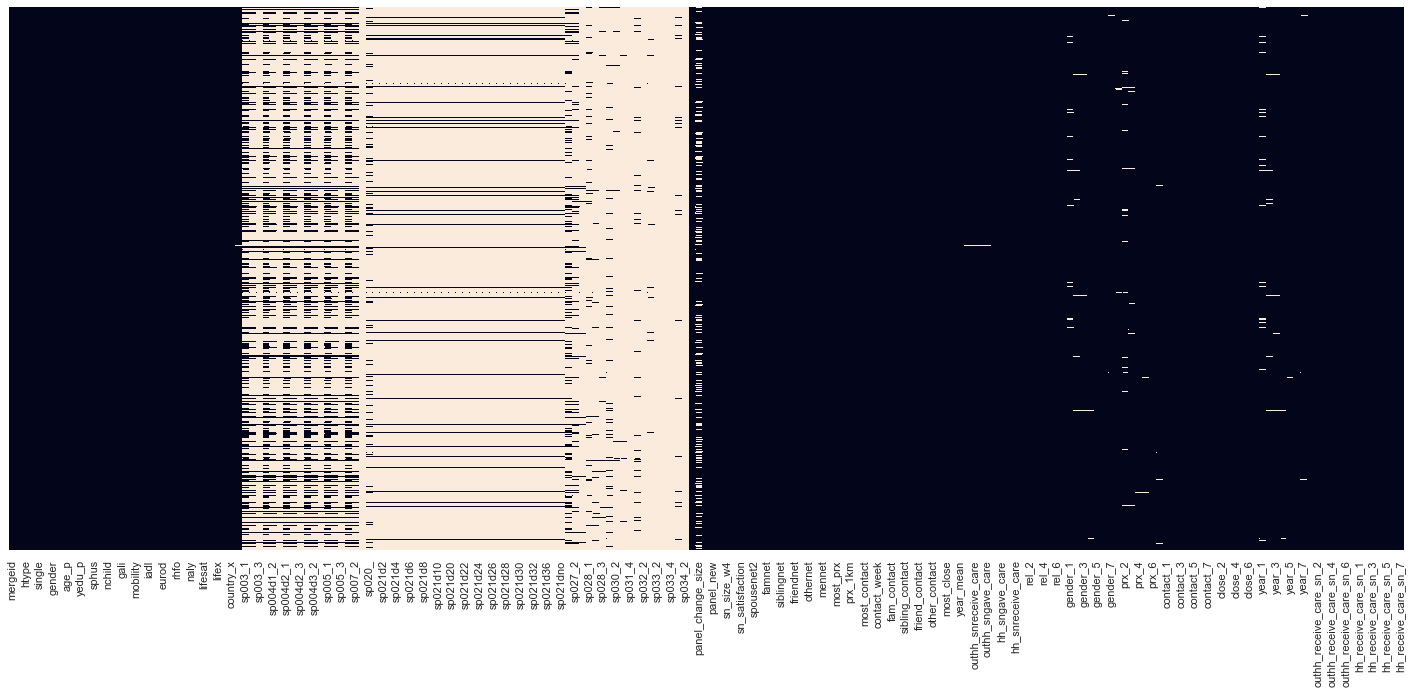

In [40]:
fig, ax = plt.subplots(figsize=(25,10))         

sns.heatmap(m3.isnull(),yticklabels=False,cbar=False)

There are features that have majority of the data missing. For better outcomes of the models, these features will be dropped.

#### Dropping the missing values

In [41]:
m3 = m3.dropna(axis=1, thresh=2500)
m3.shape

(4804, 138)

In [42]:
m3.describe()

,country,htype,nursinghome,single,couple,gender,age,age_p,yedu,yedu_p,...,outhh_receive_care_sn_5,outhh_receive_care_sn_6,outhh_receive_care_sn_7,hh_receive_care_sn_1,hh_receive_care_sn_2,hh_receive_care_sn_3,hh_receive_care_sn_4,hh_receive_care_sn_5,hh_receive_care_sn_6,hh_receive_care_sn_7
count,4804.0,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,...,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000
mean,28.0,2.317444,0.013739,0.324938,0.675062,1.594921,68.573064,12.858243,12.242714,-23.745212,...,-8.356370,-8.716070,-6.873231,-7.743755,-8.194213,-8.496461,-8.746669,-8.870108,-8.955037,-8.646961
std,0.0,0.933662,0.116416,0.468400,0.468400,0.490958,8.767016,77.924889,3.123690,52.275783,...,2.341716,1.582535,3.855980,3.174551,2.577542,2.072140,1.490109,1.076401,0.634606,1.749765
min,28.0,1.000000,0.000000,0.000000,0.000000,1.000000,50.000000,-99.000000,0.000000,-99.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,28.0,1.000000,0.000000,0.000000,0.000000,1.000000,62.000000,-99.000000,11.000000,-99.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
50%,28.0,3.000000,0.000000,0.000000,1.000000,2.000000,68.000000,61.000000,12.000000,11.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
75%,28.0,3.000000,0.000000,1.000000,1.000000,2.000000,74.000000,69.000000,13.000000,13.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
max,28.0,5.000000,1.000000,1.000000,1.000000,2.000000,103.000000,93.000000,25.000000,25.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000


When observing the the range of features, we can say with high level of confidance that there are still some missing values. SPSS sets the negative values as different types of missing values, thus all the negative values in the dataset should be set as missing values as well. 

In [43]:
m3 = m3.drop('mergeid', axis=1)

In [44]:
# cols with negative values
cols = m3.columns[(m3 < 0).any()].tolist()
cols[:5]

['age_p', 'yedu_p', 'pwork', 'rhih', 'naly']

In [45]:
# setting negative values as np.nan

m3[m3[cols] < 0] = np.nan

In [46]:
m3.isnull().sum()

country                    0
htype                      0
nursinghome                0
single                     0
couple                     0
                        ... 
hh_receive_care_sn_3    4536
hh_receive_care_sn_4    4669
hh_receive_care_sn_5    4735
hh_receive_care_sn_6    4780
hh_receive_care_sn_7    4616
Length: 137, dtype: int64

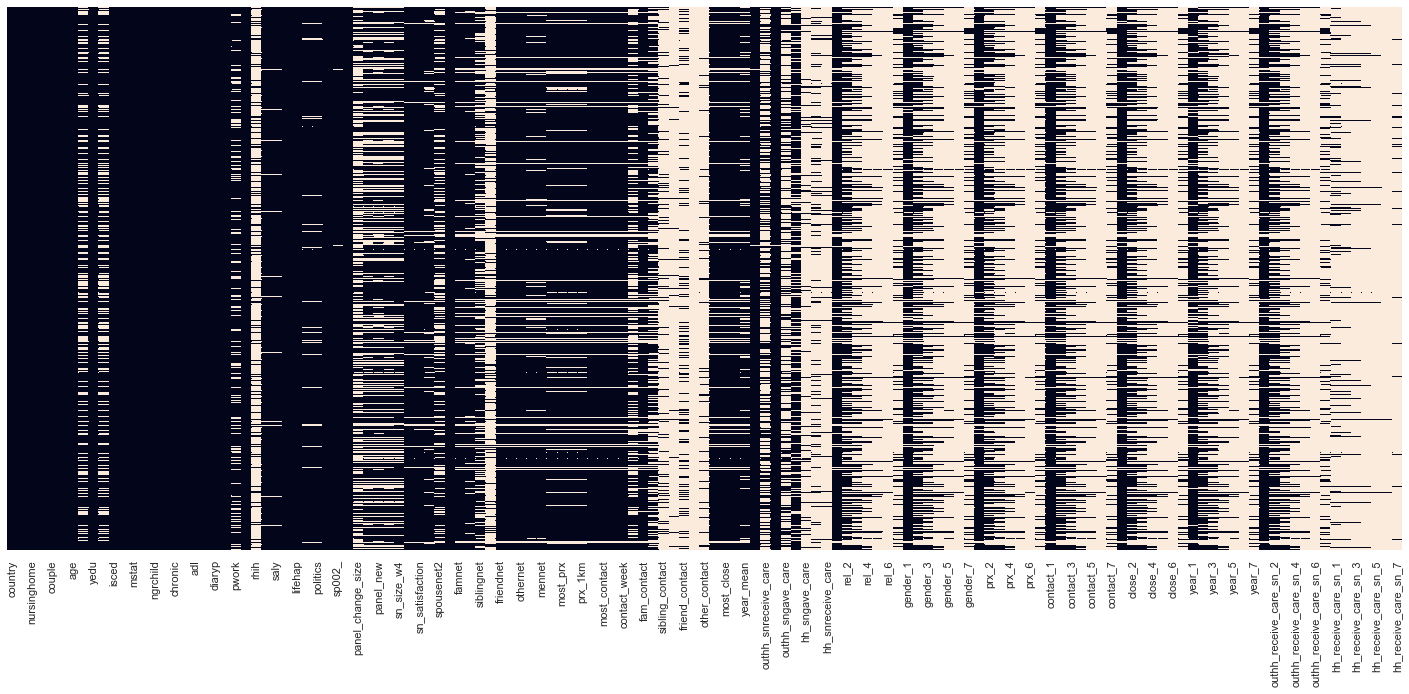

In [47]:
fig, ax = plt.subplots(figsize=(25,10))         

sns.heatmap(m3.isnull(),yticklabels=False,cbar=False)

Now we can see that, in fact, singificantly more features have majority of missing values. Let's use the threshhold of 3000  non-NA values for dropping the more features.

In [48]:
m3 = m3.dropna(axis=1, thresh=3000)
m3.shape

(4804, 73)

In [49]:
m3.isnull().sum()[15:]

gali                          0
chronic                       0
mobility                      0
adl                           0
iadl                          0
diaryp                        0
eurod                         0
pwork                       913
rhfo                          0
naly                         66
saly                         66
lifesat                       0
lifehap                       0
lifex                       158
politics                    157
country_x                     0
sp002_                        8
country_y                     0
panel_lost                 1489
panel_new                  1512
panel_continued            1489
sn_size_w4                 1222
sn_size_w6                  129
sn_satisfaction             146
sn_scale                    350
spousenet2                 1630
partner_var                   0
famnet                      377
childnet                    544
siblingnet                 1610
friendnet                   377
formalne

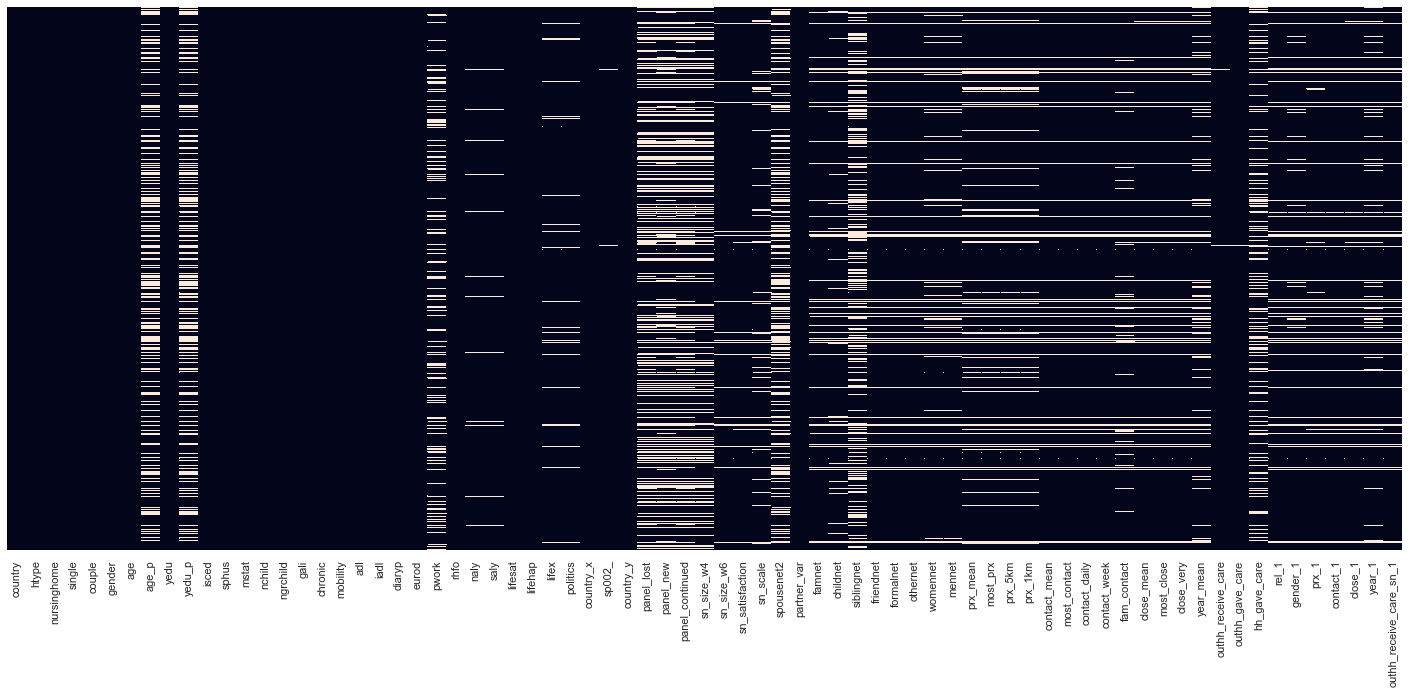

In [50]:
fig, ax = plt.subplots(figsize=(25,10))         

sns.heatmap(m3.isnull(),yticklabels=False,cbar=False)

In [51]:
# dropping columns related to partner, to panel and wave 4, country, siblingnet and hh_gave_care

var = ['age_p', 'yedu_p', 'spousenet2', 
       'panel_lost', 'panel_new', 'panel_continued', 'sn_size_w4', 
       'country', 'country_x', 'country_y',
      'siblingnet', 'hh_gave_care']

In [52]:
m3 = m3.drop(var, axis=1)
m3.shape

(4804, 61)

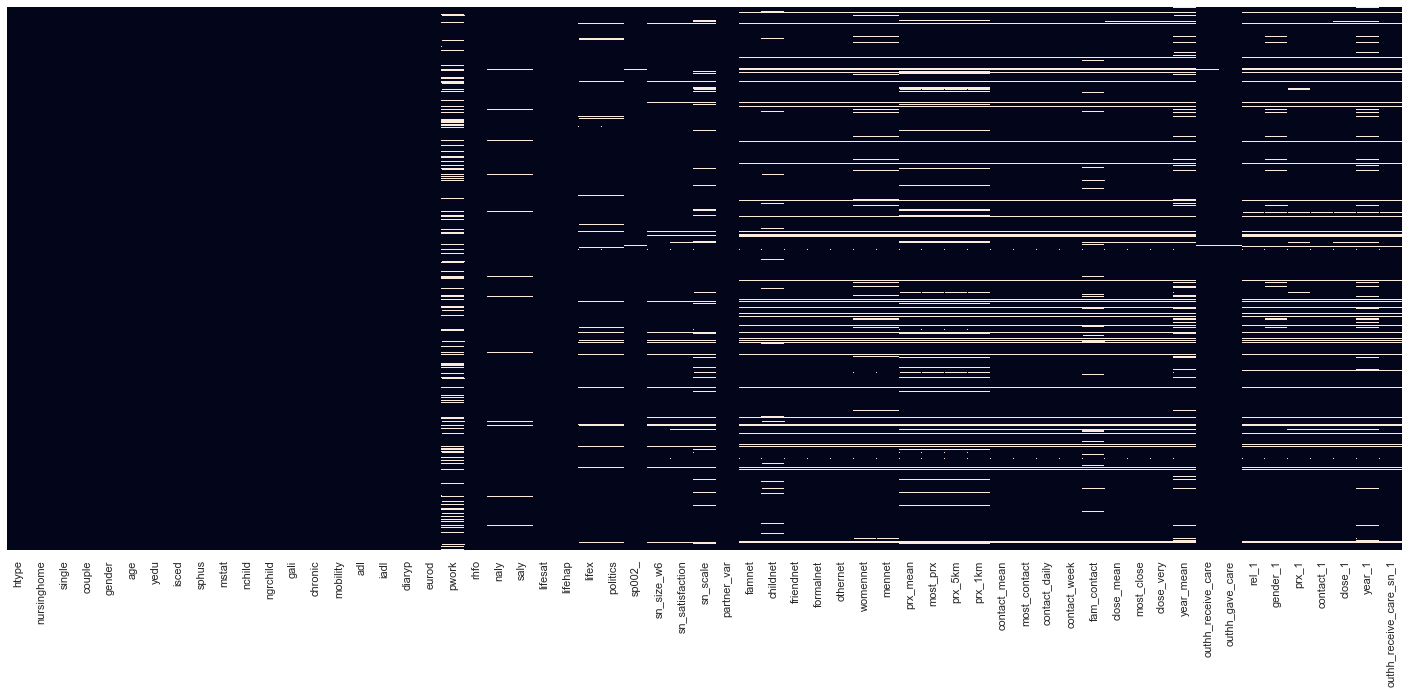

In [53]:
fig, ax = plt.subplots(figsize=(25,10))         

sns.heatmap(m3.isnull(),yticklabels=False,cbar=False)

In [54]:
m3.isnull().sum()[15:]

adl                          0
iadl                         0
diaryp                       0
eurod                        0
pwork                      913
rhfo                         0
naly                        66
saly                        66
lifesat                      0
lifehap                      0
lifex                      158
politics                   157
sp002_                       8
sn_size_w6                 129
sn_satisfaction            146
sn_scale                   350
partner_var                  0
famnet                     377
childnet                   544
friendnet                  377
formalnet                  377
othernet                   377
womennet                   552
mennet                     552
prx_mean                   594
most_prx                   594
prx_5km                    594
prx_1km                    594
contact_mean               385
most_contact               385
contact_daily              385
contact_week               385
fam_cont

In [55]:
# dropping 'Did any paid work', 'Year of birth of SN member 1', average ave of SN, 'Relation to SN member 1' (etc)

var = ['pwork', 'year_1', 'year_mean', 'rel_1', 'gender_1', 'prx_1', 'contact_1', 'close_1', 'outhh_receive_care_sn_1']

In [56]:
m3 = m3.drop(var, axis=1)
m3.shape

(4804, 52)

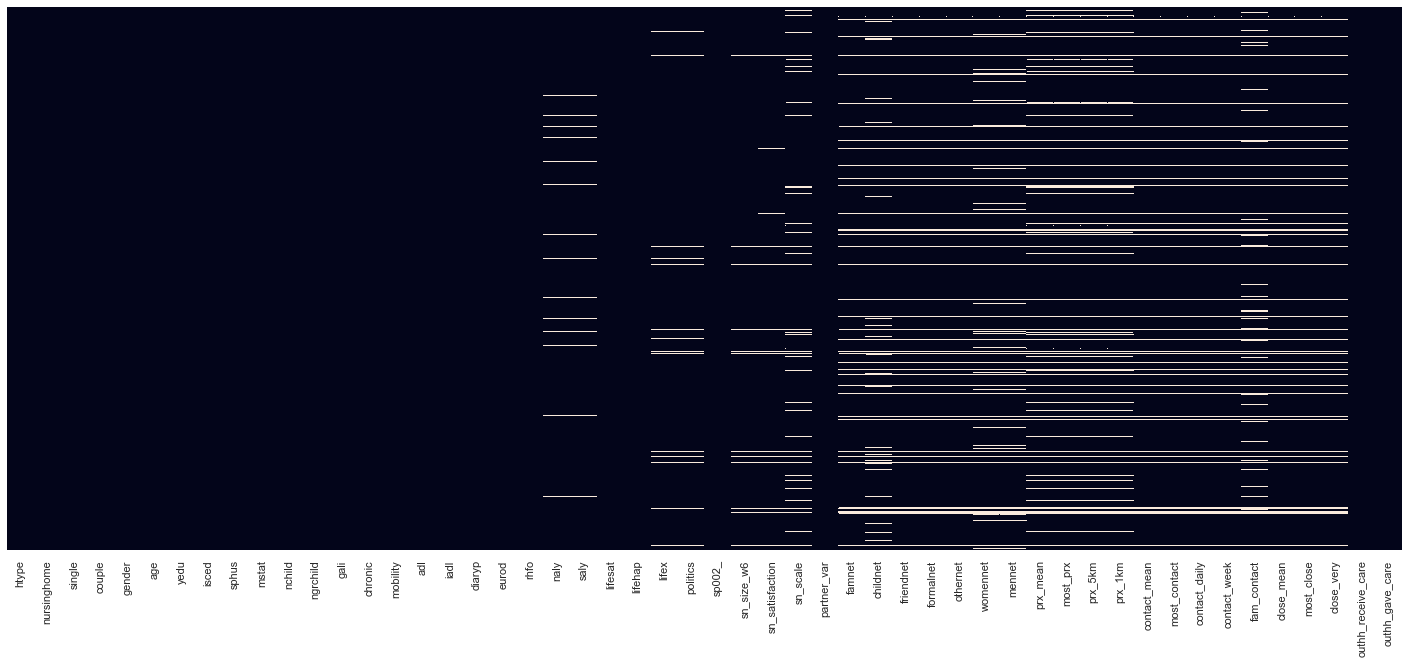

In [57]:
fig, ax = plt.subplots(figsize=(25,10))         

sns.heatmap(m3.isnull(),yticklabels=False,cbar=False)

In [58]:
# eliminating respondents with over 35 % of responses missing

m3 = m3.dropna(axis=0, thresh=0.65*52)
m3.shape

(4427, 52)

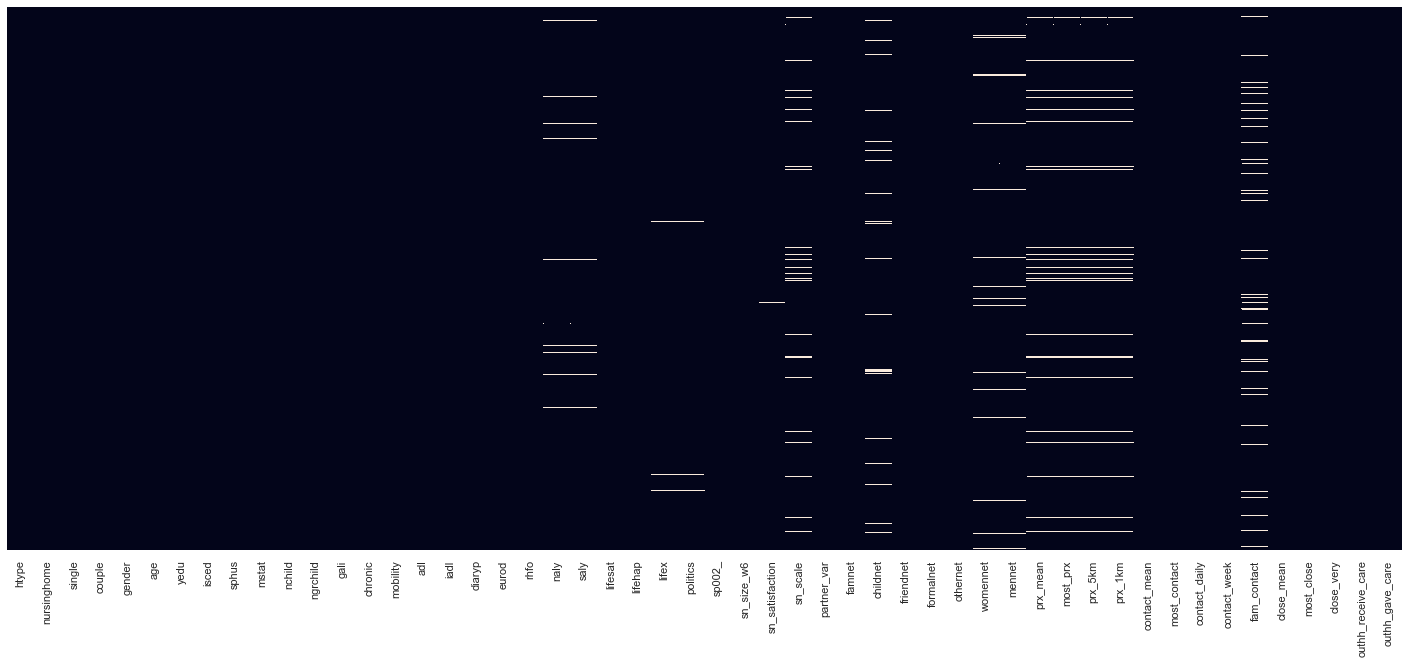

In [59]:
fig, ax = plt.subplots(figsize=(25,10))         

sns.heatmap(m3.isnull(),yticklabels=False,cbar=False)

In [60]:
m3.isnull().sum()[15:]

adl                     0
iadl                    0
diaryp                  0
eurod                   0
rhfo                    0
naly                   57
saly                   57
lifesat                 0
lifehap                 0
lifex                  41
politics               40
sp002_                  3
sn_size_w6              0
sn_satisfaction         7
sn_scale              221
partner_var             0
famnet                  0
childnet              167
friendnet               0
formalnet               0
othernet                0
womennet              175
mennet                175
prx_mean              217
most_prx              217
prx_5km               217
prx_1km               217
contact_mean            8
most_contact            8
contact_daily           8
contact_week            8
fam_contact           211
close_mean             11
most_close             11
close_very             11
outhh_receive_care      3
outhh_gave_care         4
dtype: int64

#### Filling the missing values

In [61]:
m3.describe()

,htype,nursinghome,single,couple,gender,age,yedu,isced,sphus,mstat,...,contact_mean,most_contact,contact_daily,contact_week,fam_contact,close_mean,most_close,close_very,outhh_receive_care,outhh_gave_care
count,4427.000000,4427.000000,4427.000000,4427.000000,4427.000000,4427.000000,4427.000000,4427.000000,4427.000000,4427.000000,...,4419.000000,4419.000000,4419.000000,4419.000000,4216.000000,4416.000000,4416.000000,4416.000000,4424.000000,4423.000000
mean,2.336797,0.012876,0.314886,0.685114,1.594985,68.447030,12.280325,2.800090,3.384459,2.592501,...,1.788195,1.231500,1.273818,2.244173,1.677459,3.609329,3.818388,2.393342,0.689647,0.542844
std,0.926689,0.112750,0.464523,0.464523,0.490950,8.714251,3.110087,1.145146,0.995658,2.173084,...,0.869844,0.638683,0.881206,1.243138,0.848024,0.483998,0.428420,1.337140,0.981272,0.824439
min,1.000000,0.000000,0.000000,0.000000,1.000000,50.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,62.000000,11.000000,2.000000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.285714,4.000000,1.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,1.000000,2.000000,68.000000,12.000000,3.000000,3.000000,1.000000,...,1.500000,1.000000,1.000000,2.000000,1.500000,3.800000,4.000000,2.000000,0.000000,0.000000
75%,3.000000,0.000000,1.000000,1.000000,2.000000,74.000000,13.000000,3.000000,4.000000,5.000000,...,2.250000,1.000000,2.000000,3.000000,2.000000,4.000000,4.000000,3.000000,1.000000,1.000000
max,5.000000,1.000000,1.000000,1.000000,2.000000,103.000000,25.000000,6.000000,5.000000,6.000000,...,7.000000,7.000000,6.000000,7.000000,7.000000,4.000000,4.000000,7.000000,3.000000,3.000000


##### Strategy

for filling the missing values - based on analysis of the variables bellow, together with the logic of given variable. For example, if a respondent was completely satisfied with their social network, they would likely state this fact, therefore the logic of the feature ends up being more important that the most likely value of the feature (mean or mode).

Variable | Description | Range | Values | Strategy
------------ | ------------- | ------------ |------------ |------------
naly| 'Number of activities last year'| 0 - 7 | Count | mode = 2
saly| 'Satisfied with no activities'| 0 - 10 | 0 - Completely dissatisfied, 10 - Completely satisfied  | 5 (complete satisfaction would likely be stated by the respondent)
lifex| 'Living in ten years'| 0 - 100 | chance of living in 10 years | mode = 50
politics| 'Left or right in politics'| 0 - 10 |  0.0: 'Left', 10.0: 'Right' | mode = 5
sp002_| 'Received help from others (outside hh)'| 1 - 5 | 1 - Yes, 5 - No | mode = 5
sn_satisfaction| 'Social network satisfaction' | 0 - 10 | 0 - Completely dissatisfied, 10 - Completely satisfied | 5 (complete satisfaction would likely be stated by the respondent)
sn_scale| 'Scale of social connectedness (high=high connectedness)'| 1 - 4 | high=high connectedness | mode = 2
childnet| 'Children in SN - Count'| 0 - 5 | Count | dropping the variable
womennet| 'Number of women in SN'| 0 - 7 | Count | mode = 1
mennet| 'Number of men in SN'| 0 - 7 | Count | mode = 1
prx_mean| 'SN proximity - Average'| 1 - 8 |  1.0: '(1) Same household', 2.0: '(2) Same building', 3.0: '(3) Less than 1 km', 4.0: '(4) 1-5 km', 5.0: '(5) 5-25 km', 6.0: '(6) 25-100 km', 7.0: '(7) 100-500 km', 8.0: '(8) 500+ km'| mean
most_prx| 'Proximity of closest SN member'| 1 - 8 | 1.0: '(1) Same household', 2.0: '(2) Same building', 3.0: '(3) Less than 1 km', 4.0: '(4) 1-5 km', 5.0: '(5) 5-25 km', 6.0: '(6) 25-100 km', 7.0: '(7) 100-500 km', 8.0: '(8) 500+ km'| 4 (according to data people had at least 1 person in 1-5km)
prx_5km| 'Number of SN members within 5km'| 0 - 7 | Count | mode = 1
prx_1km| 'Number of SN members within 1km'| 0 - 6 | Count | mode = 1
contact_mean| 'SN contact - Average'| 1 - 7 | 1.0: '(1)  Daily contact', 2.0: '(2)  Several times/week', 3.0: '(3)  1x/week', 4.0: '(4)  Every 2 weeks', 5.0: '(5)  Once a month', 6.0: '(6)  Less than once a month', 7.0: '(7)  Never'| mean
most_contact| 'Contact with most contacted SN member'| 1 - 7 | 1.0: '(1)  Daily contact', 2.0: '(2)  Several times/week', 3.0: '(3)  1x/week', 4.0: '(4)  Every 2 weeks', 5.0: '(5)  Once a month', 6.0: '(6)  Less than once a month', 7.0: '(7)  Never'| mode
contact_daily| 'Number of SN members with daily contact'| 0 - 6 | Count | mode = 1
contact_week| 'Number of SN members with weekly or more contact'| 0 - 7 | Count | mode = 1
fam_contact| 'Average contact with family members in SN'| 1 - 7 | 1.0: '(1)  Daily contact', 2.0: '(2)  Several times/week', 3.0: '(3)  1x/week', 4.0: '(4)  Every 2 weeks', 5.0: '(5)  Once a month', 6.0: '(6)  Less than once a month', 7.0: '(7)  Never'| mean
close_mean| 'SN emotional closeness - Average'| 1 - 4 | 1.0: '(1)  Not very close', 2.0: '(2)  Somewhat close', 3.0: '(3)  Very close', 4.0: '(4)  Extremely close'| mean
most_close| 'Emotional closeness of closest SN member'| 1 - 4 | 1.0: '(1)  Not very close', 2.0: '(2)  Somewhat close', 3.0: '(3)  Very close', 4.0: '(4)  Extremely close' | mode = 4
close_very| 'Number of SN - Very to extrememly close'| 0 - 7 | Count | mode = 1
outhh_receive_care| 'Received personal/practical help from person(s) outside hh - Count'| 0 - 3 | Count | mode = 0
outhh_gave_care| 'Gave personal/practical help to person(s) outside hh - Count'| 0 - 3 | Count | mode = 0



In [62]:
meta_n.value_labels[meta_n.variable_to_label['most_close']]

{-20.0: '(-20) Missing information',
 -9.0: '(-9) Does not apply',
 -2.0: '(-2) Refusal',
 -1.0: "(-1) Don't know",
 1.0: '(1)  Not very close',
 2.0: '(2)  Somewhat close',
 3.0: '(3)  Very close',
 4.0: '(4)  Extremely close'}

In [63]:
meta_imp.value_labels[meta_imp.variable_to_label['saly']]

{-99.0: 'Not applicable',
 0.0: 'Completely dissatisfied',
 10.0: 'Completely satisfied'}

In [64]:
# selecting only variables with missing data
m3nan = m3[m3.columns[m3.isnull().any()]]
m3nan.head()

,naly,saly,lifex,politics,sp002_,sn_satisfaction,sn_scale,childnet,womennet,mennet,...,contact_mean,most_contact,contact_daily,contact_week,fam_contact,close_mean,most_close,close_very,outhh_receive_care,outhh_gave_care
0,3.0,9.0,50.0,10.0,5.0,9.0,2.0,1.0,2.0,1.0,...,1.333333,1.0,2.0,3.0,1.333333,3.333333,4.0,3.0,0.0,0.0
1,2.0,8.0,80.0,10.0,5.0,9.0,NaN,2.0,2.0,3.0,...,1.200000,1.0,4.0,5.0,1.200000,3.600000,4.0,5.0,0.0,0.0
2,2.0,5.0,5.0,5.0,5.0,8.0,3.0,2.0,1.0,3.0,...,3.750000,2.0,0.0,1.0,4.000000,3.500000,4.0,4.0,0.0,1.0
3,3.0,10.0,30.0,10.0,5.0,8.0,1.0,NaN,1.0,0.0,...,1.000000,1.0,1.0,1.0,1.000000,4.000000,4.0,1.0,0.0,0.0
4,2.0,10.0,50.0,3.0,5.0,8.0,1.0,NaN,0.0,1.0,...,1.000000,1.0,1.0,1.0,1.000000,4.000000,4.0,1.0,0.0,0.0


In [65]:
m3nan.shape

(4427, 24)

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


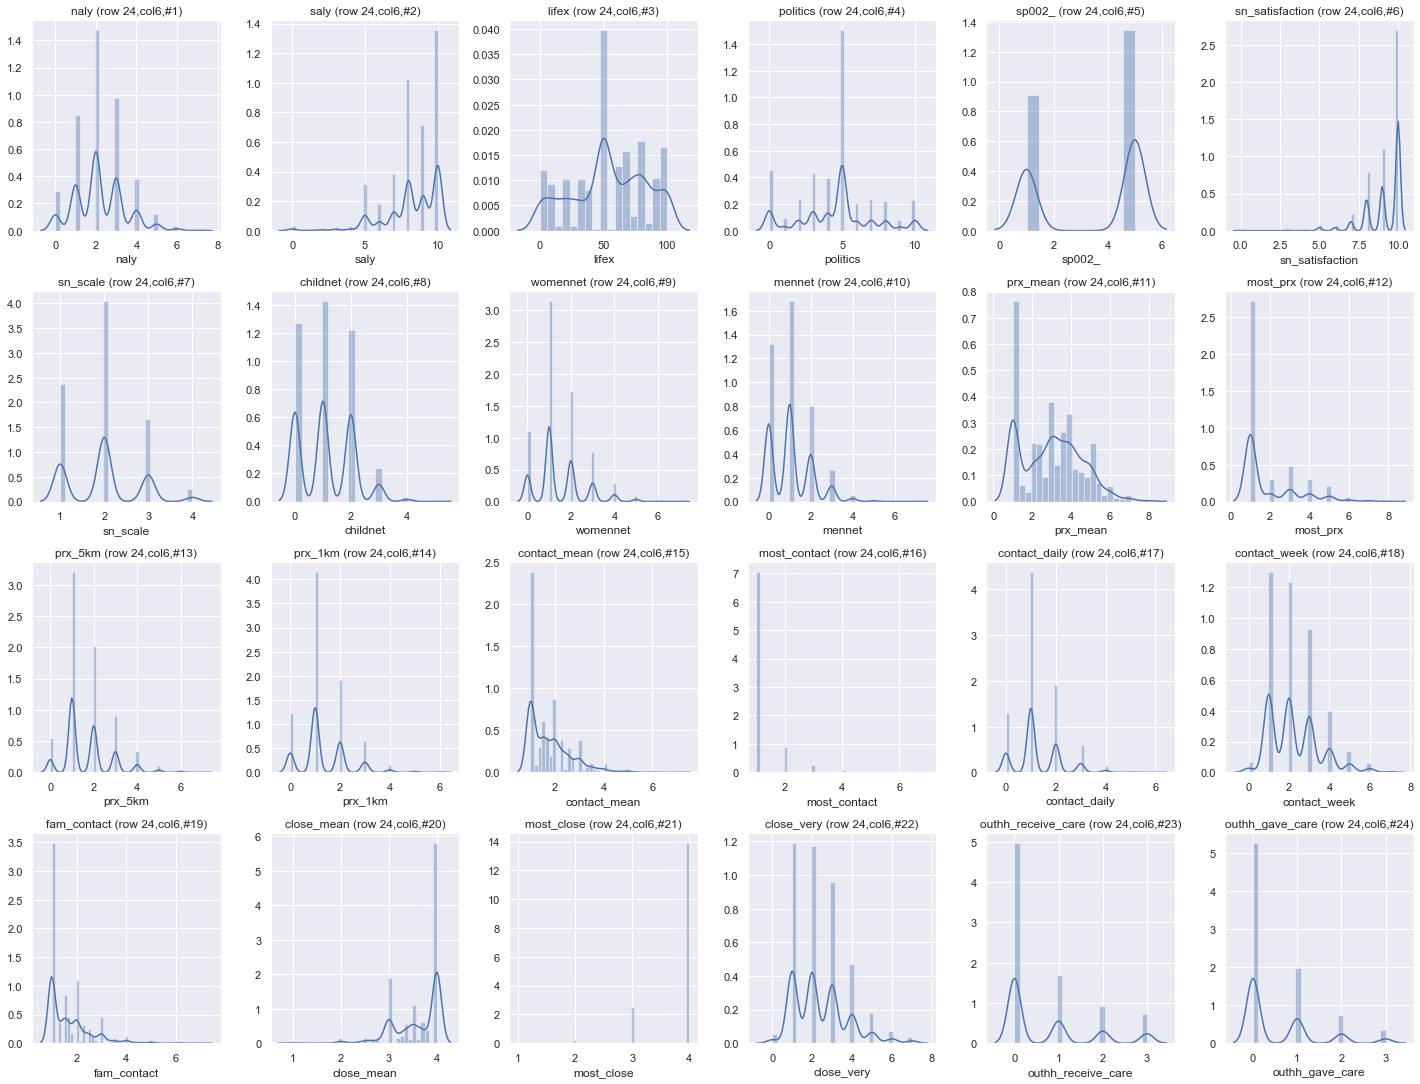

In [66]:
#  distribution plots of variables with missing values
rowCnt = len(m3nan.columns)
colCnt = 6     # cols:  OVERALL, NO DISEASE, DISEASE
subCnt = 1     # initialize plot number

fig = plt.figure(figsize=(20,90))

for i in m3nan.columns:
    # OVERALL plots
    plt.subplot(rowCnt, colCnt, subCnt)
    plt.title('{} (row {},col{},#{})'.format(i, rowCnt, colCnt, subCnt), fontsize=12)
    #plt.xlabel(i, fontsize=12)
    plt.tight_layout()
    sns.distplot(m3nan[i])
    subCnt = subCnt + 1
    
plt.show()

In [67]:
for i in m3nan.columns:
    print(i)
    print(m3nan[i].value_counts().sort_index())

naly
0.0     311
1.0     898
2.0    1554
3.0    1033
4.0     400
5.0     129
6.0      37
7.0       8
Name: naly, dtype: int64
saly
0.0       37
1.0        7
2.0       20
3.0       30
4.0       36
5.0      339
6.0      194
7.0      407
8.0     1095
9.0      762
10.0    1443
Name: saly, dtype: int64
lifex
0.0       242
1.0        15
2.0         6
3.0         4
4.0         1
5.0        45
6.0         1
7.0         2
8.0         1
10.0      234
15.0       24
20.0      262
25.0       21
28.0        1
30.0      251
35.0       16
37.0        2
40.0      208
45.0        6
46.0        1
49.0        1
50.0     1024
55.0        6
56.0        1
57.0        2
60.0      331
61.0        1
65.0       16
69.0        7
70.0      383
75.0       74
76.0        1
77.0        1
78.0        1
79.0        2
80.0      456
85.0       40
87.0        1
89.0        2
90.0      265
91.0        1
95.0       26
98.0        6
99.0       21
100.0     374
Name: lifex, dtype: int64
politics
0.0      486
1.0      100
2.0 

##### Dropping unwanted variable

In [68]:
# dropping the childnet (it's directly linked to being a parent, which would influence our model)

m3 = m3.drop(['childnet'], axis=1)

##### Filling the missing values

In [69]:
# filling with mode

fill_mode = ['womennet', 'mennet', 'prx_5km', 'prx_1km', 'contact_daily', 'contact_week', 'close_very', 'most_contact',
             'outhh_receive_care', 'outhh_gave_care', 'naly', 'sn_scale', 'politics', 'sp002_', 'most_close', 'lifex' ]

for column in fill_mode:
    m3[column].fillna(m3[column].mode()[0], inplace=True)

In [70]:
# filling with mean

fill_mean = ['prx_mean', 'contact_mean', 'fam_contact', 'close_mean']

for column in fill_mean:
    m3[column].fillna(m3[column].mean(), inplace=True)

In [71]:
# filling saly and sn_satisfaction with 5 (specifically choosing not using the mode - 10, as it's too enthusiastic)

m3[['saly', 'sn_satisfaction']] = m3[['saly', 'sn_satisfaction']].fillna(value=5)

In [72]:
# looking how the rows with missing values look

m3[m3.isnull().any(axis=1)]

,htype,nursinghome,single,couple,gender,age,yedu,isced,sphus,mstat,...,contact_mean,most_contact,contact_daily,contact_week,fam_contact,close_mean,most_close,close_very,outhh_receive_care,outhh_gave_care
1,3.0,0.0,0.0,1.0,2.0,79.0,13.0,3.0,3.0,1.0,...,1.200000,1.0,4.0,5.0,1.200000,3.600000,4.0,5.0,0.0,0.0
22,3.0,0.0,0.0,1.0,1.0,77.0,17.0,3.0,2.0,5.0,...,3.200000,1.0,1.0,3.0,2.500000,3.600000,4.0,5.0,0.0,2.0
33,3.0,0.0,0.0,1.0,1.0,59.0,12.0,3.0,4.0,1.0,...,1.500000,1.0,1.0,2.0,1.500000,4.000000,4.0,2.0,0.0,0.0
37,3.0,0.0,0.0,1.0,1.0,66.0,11.0,2.0,2.0,1.0,...,1.666667,1.0,1.0,3.0,1.666667,3.333333,4.0,3.0,0.0,1.0
59,3.0,0.0,0.0,1.0,2.0,63.0,12.0,2.0,4.0,1.0,...,3.500000,1.0,1.0,1.0,3.500000,3.000000,3.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,3.0,0.0,0.0,1.0,2.0,74.0,12.0,3.0,4.0,1.0,...,1.666667,1.0,2.0,3.0,1.666667,3.666667,4.0,3.0,0.0,0.0
4801,3.0,0.0,0.0,1.0,1.0,70.0,12.0,2.0,3.0,1.0,...,2.000000,1.0,1.0,2.0,2.000000,3.500000,4.0,2.0,2.0,2.0
4814,3.0,0.0,0.0,1.0,2.0,73.0,8.0,1.0,4.0,1.0,...,1.333333,1.0,2.0,3.0,1.333333,3.333333,4.0,3.0,0.0,1.0
4815,3.0,0.0,0.0,1.0,2.0,66.0,13.0,3.0,4.0,1.0,...,2.500000,1.0,1.0,3.0,2.500000,3.250000,4.0,4.0,0.0,1.0


In [73]:
# filling most_prx with 4 (provided they have 1 person in 1-5km)

m3['most_prx'] = m3['most_prx'].fillna(value=4)

In [74]:
m3.isnull().sum().sum()

0

## Creating target variable parent

In [75]:
m3.nchild.value_counts().sort_index()

0.0      160
1.0      684
2.0     2327
3.0      859
4.0      255
5.0       76
6.0       33
7.0       25
8.0        5
10.0       1
12.0       2
Name: nchild, dtype: int64

In [76]:
def parent_var(x):
    if x == 0:
        return 0
    elif x > 0:
        return 1


m3['parent'] = m3['nchild'].apply(parent_var)

In [77]:
m3.parent.value_counts().sort_index()

0     160
1    4267
Name: parent, dtype: int64

In [78]:
#dropping nchild and ngrchild as it is directly connected to being a parent, which would negatively influence our model

m3 = m3.drop(['nchild', 'ngrchild'], axis=1)

## Balancing target variable

as there is only about 3.5 % of nonparents in the dataset, balancing of the target variable is necessary, as the models could just simply predict all data points to be parents and the model would be 96.5% successful. This can be easily done with SMOTE (Synthetic Minority Over-sampling Technique) from imblearn library.

In [79]:
# creating the variables for classications
X = m3.drop('parent', axis=1)
y = m3['parent']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=13)

sm = SMOTE(random_state=13, sampling_strategy = 1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [81]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))


print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 3413
Before OverSampling, counts of label '0': 128 

After OverSampling, the shape of train_X: (6826, 49)
After OverSampling, the shape of train_y: (6826,) 

After OverSampling, counts of label '1': 3413
After OverSampling, counts of label '0': 3413


## Random forest classifier

### Base model

In [82]:
rfc = RandomForestClassifier(random_state=13)

rfc.fit(X_train_res, y_train_res)
print("Accuracy on training set: {:.3f}".format(rfc.score(X_train_res, y_train_res)))
print("Accuracy on test set: {:.3f}".format(rfc.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.966


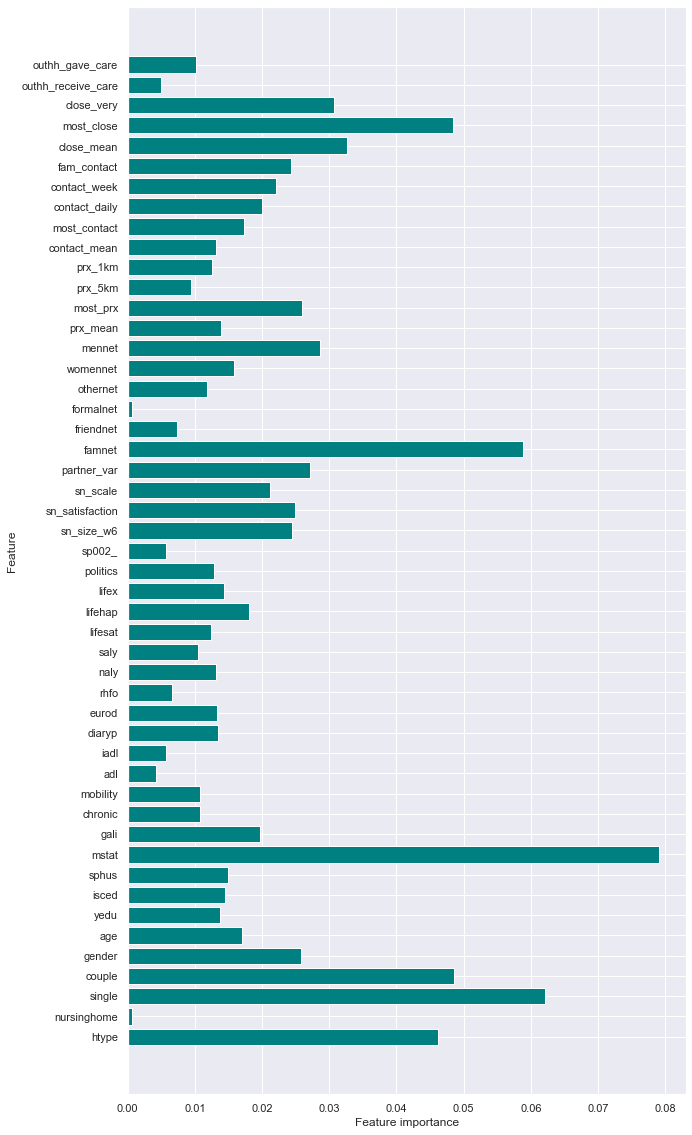

In [83]:
def plot_feature_importances(model, X):
    n_features = X.shape[1]
    plt.figure(figsize=(10,20))
    plt.barh(range(n_features), model.feature_importances_, align='center', color='teal')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(rfc, X)

From the base model is visible, that amongs most important features are marital status, whether respondent is single or not, number of family members in their social network, emotional closeness of closest social network member, and household type.

#### Evaluation of the base model

In [84]:
# predictions
rfc_predict = rfc.predict(X_test)

In [85]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [86]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[  4  28]
 [  2 852]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.67      0.12      0.21        32
           1       0.97      1.00      0.98       854

    accuracy                           0.97       886
   macro avg       0.82      0.56      0.60       886
weighted avg       0.96      0.97      0.95       886



=== All AUC Scores ===
[0.73550937 0.82355094 0.74085187 0.8081089  0.6679596  0.78300644
 0.78088407 0.7219777  0.80751174 0.83700117]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.770636180470803


In [87]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rfc_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5613290398126464

Even though the model has over 96% accuracy on test set, we can see that it's not performing well in detecting nonparents.

**Precision** (how precise the model is out of those predicted positive) is 97% for parents, but also predicts 67% of nonparents to be parents.

**Recall** (calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive)) is 100% for parents, but only 12% of nonparents were detected correctly.

**F1 score** (balanced F-score or F-measure; weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0) for the class of nonparents is also rather week (0.21).

**The ROC curve** plots out the true positive rate versus the false positive rate at various thresholds. The roc_auc scoring used in the cross-validation model shows the area under the ROC curve. Mean AUC score is 0.77, which by itself doesn't mean a bad model, but other parameters show us, that prediction of nonparents is rather weak. ROC AUC of test set is then only 0.56.

Overall, this model is not successful in predicting the minority category. The hyperparameter tuning will try to fix this problem.

### Hyperparameter tuning of RF

#### N_estimators

tuning the number of trees in the forest.

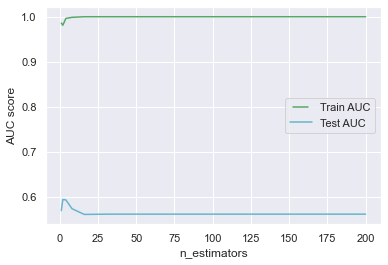

In [88]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, random_state=13)
    rf.fit(X_train_res, y_train_res)

    train_pred = rf.predict(X_train_res)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_res, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
    
line1, = plt.plot(n_estimators, train_results, 'g', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'c', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

Model is clearly overfitting, but it seems like the problem is bit improved with smaller number of trees. Let's see how smaller number of trees perform.

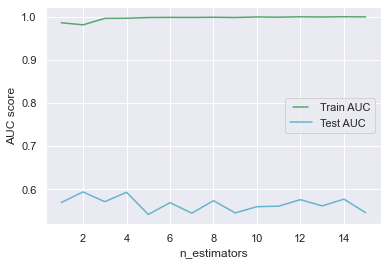

In [89]:
n_estimators = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
train_results = []
test_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, random_state=13)
    rf.fit(X_train_res, y_train_res)

    train_pred = rf.predict(X_train_res)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_res, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
    
line1, = plt.plot(n_estimators, train_results, 'g', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'c', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

Best result are with n_estimators = 2 and 4, but as I want to prevent overfitting on training set, I will choose n_estimators = 2, as the AUC score doesn't equal 1 for that value.

#### Max_depth

represents the depth of each tree in the forest.

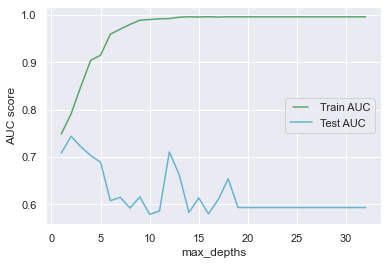

In [90]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_estimators=4, n_jobs=-1, random_state=13)
    rf.fit(X_train_res, y_train_res)
    
    train_pred = rf.predict(X_train_res)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_res, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(max_depths, train_results, 'g', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'c', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('max_depths')
plt.show()

The AUC scores are fluctuating for the smaller depth, so let's further investigate that part.

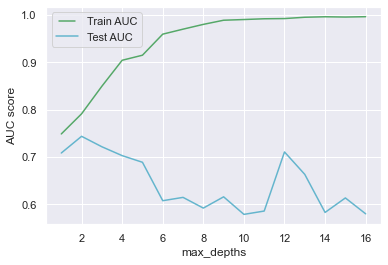

In [91]:
max_depths = np.linspace(1, 16, 16, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_estimators=4, n_jobs=-1, random_state=13)
    rf.fit(X_train_res, y_train_res)
    
    train_pred = rf.predict(X_train_res)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_res, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(max_depths, train_results, 'g', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'c', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('max_depths')
plt.show()

Best results can be seen with max_depth = 2, where the AUC score of train and test set is closest, and also AUC score of the test set is the highest.

#### Min_samples_split

represents the minimum number of samples required to split an internal node.

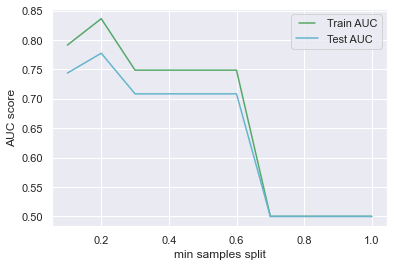

In [92]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=min_samples_split, max_depth=2, n_estimators=4,
                                n_jobs=-1, random_state=13)
    rf.fit(X_train_res, y_train_res)
    
    train_pred = rf.predict(X_train_res)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_res, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(min_samples_splits, train_results, 'g', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'c', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

Best result is with min_samples_split = 0.2.

#### Min_samples_leaf

is the minimum number of samples required to be at a leaf node. 

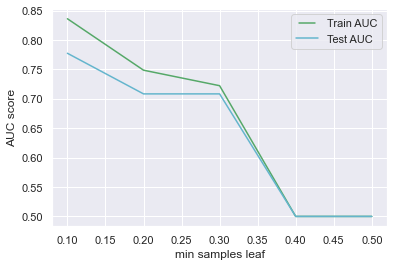

In [93]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf, min_samples_split=0.2, max_depth=2, 
                                n_estimators=4, n_jobs=-1, random_state=13)
    rf.fit(X_train_res, y_train_res)
    
    train_pred = rf.predict(X_train_res)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_res, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(min_samples_leafs, train_results, 'g', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'c', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

Best result is with value of min_samples_leaf = 0.1.

#### Best RF model

Accuracy on training set: 0.836
Accuracy on test set: 0.919


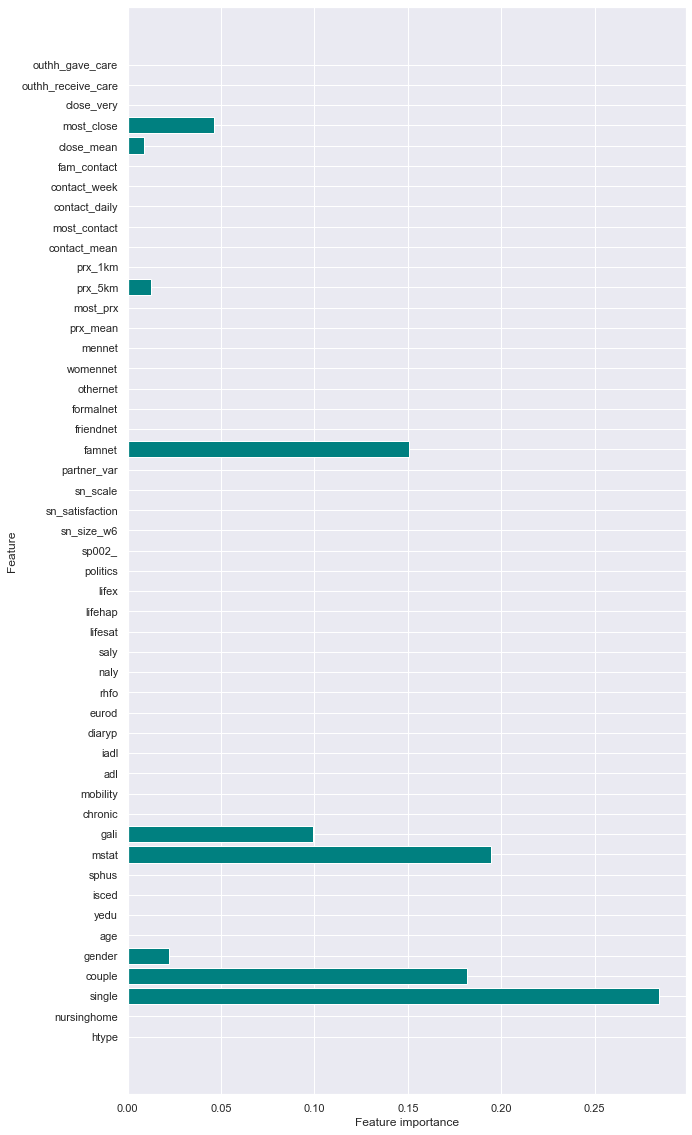

In [94]:
best_model = RandomForestClassifier(min_samples_leaf=0.1, min_samples_split=0.2, max_depth=2, 
                                n_estimators=4, n_jobs=-1, random_state=13)
best_model.fit(X_train_res, y_train_res)

print("Accuracy on training set: {:.3f}".format(best_model.score(X_train_res, y_train_res)))
print("Accuracy on test set: {:.3f}".format(best_model.score(X_test, y_test)))

plot_feature_importances(best_model, X)

Interestingly, the model now chooses smaller number of features that significantly contribute to the model. Within the most important features are whether person is single or partnered and their marital status. They are followed by number of family members in one's network, limitation with activities, emotional closeness of closest social network member and their gender.

This model has accuracy of 83.6% on training set and 91.9% on validation set.

##### Evaluation of the best model

In [95]:
best_predict = best_model.predict(X_test)
best_cv_score = cross_val_score(best_model, X, y, cv=10, scoring='roc_auc')

In [96]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, best_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, best_predict))
print('\n')
print("=== All AUC Scores ===")
print(best_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", best_cv_score.mean())

=== Confusion Matrix ===
[[ 20  12]
 [ 60 794]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.25      0.62      0.36        32
           1       0.99      0.93      0.96       854

    accuracy                           0.92       886
   macro avg       0.62      0.78      0.66       886
weighted avg       0.96      0.92      0.93       886



=== All AUC Scores ===
[0.59762881 0.74751171 0.65171253 0.70367389 0.66078747 0.81213407
 0.7710041  0.67253521 0.83303991 0.68676643]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7136794125408187


In [97]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, best_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7773711943793911

This model also has a better success in predicting the minority group, with recall on nonparental class of 62%. This comes at cost of incorrectly classifying small portion of parents as nonparents.

Also ROC AUC improved from 0.56 of the base model to 0.77 of the final model.

## ANN

Next I will try simple ANN to see whether the model can achieve higher accuracy and recall of minority class.

### Normalizing the data and balancing target variable

In [98]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=13)

sm = SMOTE(random_state=13, sampling_strategy = 1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [100]:
X.shape

(4427, 49)

### ANN model architecture

After experimenting with different number of nods and layers, I came to the conclussion that the basic model gives the best results (even though it still overfits).

In [101]:
# define model architecture

model = Sequential()

#model.add(Dense(128, activation='softmax', input_dim=49))
#model.add(Dense(128, activation='relu'))
#model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu', input_dim=49))
#tensorflow.keras.layers.Dropout(rate=.2, noise_shape=None, seed=None)
#model.add(Dense(32, activation='relu'))
#model.add(Dense(16, activation='relu'))
          
model.add(Dense(1, activation='sigmoid'))

In [102]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1600      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,633
Trainable params: 1,633
Non-trainable params: 0
_________________________________________________________________


In [103]:
# compile the model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

In [104]:
# training the model

history = model.fit(X_train_res, y_train_res, epochs=50, batch_size=64, validation_data = (X_test,y_test))

Epoch 1/50
107/107 [==============================] - 1s 6ms/step - loss: 0.6036 - binary_accuracy: 0.6715 - val_loss: 0.5766 - val_binary_accuracy: 0.7280
Epoch 2/50
107/107 [==============================] - 0s 2ms/step - loss: 0.4808 - binary_accuracy: 0.7718 - val_loss: 0.4492 - val_binary_accuracy: 0.8047
Epoch 3/50
107/107 [==============================] - 0s 2ms/step - loss: 0.4320 - binary_accuracy: 0.8022 - val_loss: 0.4470 - val_binary_accuracy: 0.7923
Epoch 4/50
107/107 [==============================] - 0s 3ms/step - loss: 0.3944 - binary_accuracy: 0.8337 - val_loss: 0.4000 - val_binary_accuracy: 0.8093
Epoch 5/50
107/107 [==============================] - 0s 2ms/step - loss: 0.3634 - binary_accuracy: 0.8538 - val_loss: 0.3872 - val_binary_accuracy: 0.8228
Epoch 6/50
107/107 [==============================] - 0s 2ms/step - loss: 0.3350 - binary_accuracy: 0.8699 - val_loss: 0.3680 - val_binary_accuracy: 0.8341
Epoch 7/50
107/107 [==============================] - 0s 2ms/ste

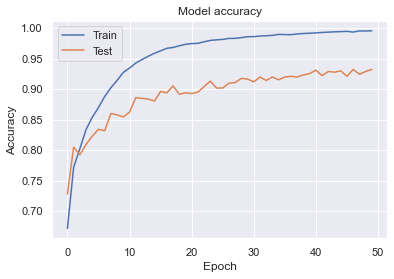

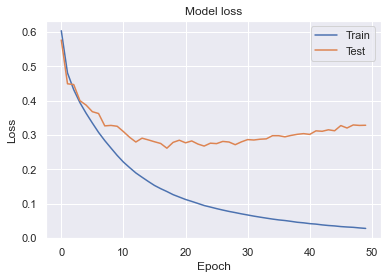

In [105]:
# plotting accuracy

plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# plotting loss

plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='best') 

plt.show()

In [106]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

28/28 - 0s - loss: 0.3285 - binary_accuracy: 0.9323
Accuracy on test dataset: 0.9322798848152161


In [107]:
test_predictions = model.predict(X_test)
test_predictions[:10]

array([[0.999912  ],
       [0.9999975 ],
       [0.9041494 ],
       [0.99999964],
       [0.9968105 ],
       [0.9999994 ],
       [0.99666286],
       [1.        ],
       [0.99483657],
       [0.99999875]], dtype=float32)

In [108]:
test_result=[]
for i in test_predictions:
    if i>0.5:
        test_result.append(1)
    else:
        test_result.append(0)

In [109]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, test_result))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, test_result))

=== Confusion Matrix ===
[[  5  27]
 [ 33 821]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.13      0.16      0.14        32
           1       0.97      0.96      0.96       854

    accuracy                           0.93       886
   macro avg       0.55      0.56      0.55       886
weighted avg       0.94      0.93      0.94       886



### Evaluation of the model

The model has rather high accuracy of 99.6 for test and 93.5% for validation set. But when we look closer into classification report and confusion matrix, we can see that it performs poorly in classifying the minority group. The recall of nonparental group is only 12%.

## Conclusion and discussion

this project aimed to compare Random Forest and Artificial Neural Network in prediction whether 50+ Czech adult was parent or not. 

Both models struggled with detection of minority group - nonparents, but even the base model of Random Forest was better in classifying the parents. Overall, after fine tuning, Random Forest is model that gives better results with this dataset.

Another advantage of Random Forest model is that we can display the feature importance, which is rather important for analysis of differences between given two groups. Black box models like ANN do not have this option.

As a next steps, possible directions of feature influences could be examined. Also comparison with linear models, for example with logistic regression could be done.